# Laplace's Equation

Numerical solutions to many physical problems can be found using finite difference methods. In this approach, a regular grid is imposed on a region. At each point on the grid, the differential equation governing the system is approximated. The resulting equations are then solved iteratively. The relaxation method is a relatively simple example. The problem is to find the potential $V$ in empty regions ($\rho$ = 0) when $V$ is known on the boundaries.

The Laplace equation is of fundamental importance in physics, and is most often first encountered in electrodynamics.

$$
\nabla^{2} V = 0.
$$

As discussed in Lecture, the solution to Laplace's equation can be thought of as taking many small averages around each point and then assigning those averages to the point in the middle. 

For simple surfaces -- flat planes, cylinders, spheres -- it is easy to solve these systems analytically. 

However, when the geometry of the system becomes complex, it is often necessary to evaluate the solutions to Laplace's equation numerically, typically using a simple program that iteratively averages around the point at which the solution is being evaluated.

## Electrodynamics

In E&M (for example, in PHYS 225 which usually uses the textbook from Griffiths) you're often taught the solution to Laplace's equation in two dimensions, $V(x,y)$, can be found by evaluating:

$$
V(x,y) = \frac{1}{2\pi R} \oint_{\rm circle} V dl
$$

iteratively, until the change in $V(x,y)$ on successive evaluations of this expression is smaller than some tolerance. 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as colormap
%matplotlib inline

## Solving Laplace's equation

The primary task of this example is to evaluate, in two dimensions, the linear average of the neighboring points in a mesh with a certain range (`numxbins` vs `numybins`).

As an example in one dimension,

~~~~
# Iterate over the one dimensional space
for i in np.arange(1., numxbins):
    Vnext[i] = (V[i-1] + V[i+1])/2.
~~~~

Function that solves the two-dimensional Laplace equation for a given number of "bins" in X (numxbins) and Y (numybins), and with a requirement on the precision of the estimation (epsilon), as well as a failsafe maximum number of iterations (imax)

In [25]:
def SolveLaplace(numxbins, numybins, epsilon = 1e-5, imax = 1000):

    ## Initialize the mesh with default values of zero
    V = np.zeros((numxbins+1, numybins+1))

    ## Set boundary conditions for the problem
    V[0,:]        = 100  ## XMin Boundary
    V[numxbins,:] = 100  ## XMax Boundary
    V[:,0]        = 0    ## YMin Boundary
    V[:,numybins] = 0    ## YMax Boundary

    ## Store previous grid values to check against error tolerance
    Vnext = V + np.zeros((numxbins+1, numybins+1))
    error = Vnext - V

    ## Constants
    k = 1          ## k is just is a counter

    ## Iterative procedure
    while k <= imax:
 
        # Iterate over the two dimensional space
        for i in np.arange(1, numxbins):

            for j in np.arange(1,  numybins):

                # Calculate the new value of the potential at this point
                # and the difference with respect to the previous value
                Vnext[i,j] = (V[i-1,j] + V[i+1,j] + V[i,j-1] + V[i,j+1])/4.
                error[i,j] = np.abs(Vnext[i,j] - V[i,j])

        # Set the potential to the newly calculated value and increment the counter
        V = Vnext + np.zeros((numxbins+1, numybins+1))
        k += 1
        
        # Update the maximum error across the mesh
        errmax = np.max(np.max(error))

        # Determine if the maximum error across the mesh is smaller than the specified 
        # tolerance
        if errmax < epsilon:

            print("Convergence after ", k, " iterations.")
            return V

    print("No convergence after ", k, " iterations.")
    return False

Function that handles the plotting of a function V for a given range in X (numxbins) and Y (numybins) and spacing (stepsize) in both dimensions

In [26]:
def PlotSolution(numxbins,numybins,stepsize,V):

    ## Set up x and y vectors for meshgrid
    x = np.linspace(0, numxbins * stepsize, numxbins+1)
    y = np.linspace(0, numybins * stepsize, numybins+1)

    fig1 = plt.figure()
    ax   = fig1.gca(projection='3d')
    X,Y  = np.meshgrid(x,y)
    surf = ax.plot_surface(X, Y, V.transpose(), cmap=colormap.cool, linewidth=0, antialiased=False)
    plt.xlabel("X")
    plt.ylabel("Y")

    fig2 = plt.figure()
    cs   = plt.contourf(X, Y, V.transpose(), 32, cmap=colormap.cool)
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.show()

('Convergence after ', 761, ' iterations.')


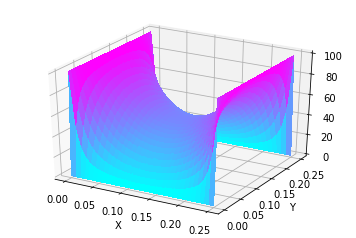

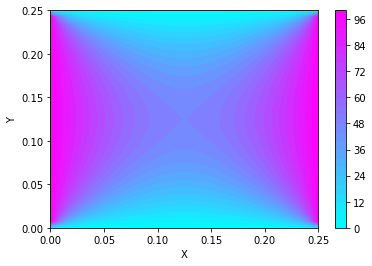

In [31]:
## Size of plate and mesh
numxbins = 32
numybins = 32
stepsize = 1./128.

## Tolerance and failsafe
epsilon = 1e-2  ## Absolute Error tolerance
imax = 10000    ## Maximum number of iterations allowed

## Calculate the scalar function V
V = SolveLaplace(numxbins, numybins, epsilon, imax)

## Plot V
PlotSolution(numxbins, numybins, stepsize, V)
plt.show()